## Stroke Prediction Analysis

Strokes are a leading cause of death and disability worldwide. Understanding the factors that contribute to stroke risk can help in early detection and prevention. In this notebook, we will explore a dataset related to stroke prediction and see what insights we can uncover. If you find this notebook useful, please upvote it.


In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the dataset
file_path = 'DATA/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Overview
Let's take a quick look at the structure of the dataset.

In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Data Cleaning
Before diving into analysis, we need to clean the data. This includes handling missing values and encoding categorical variables.

In [5]:
# Check for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Fill missing BMI values with the mean BMI
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

### Exploratory Data Analysis (EDA)
Let's explore the data to understand the distribution of various features and their relationships with the target variable (stroke).

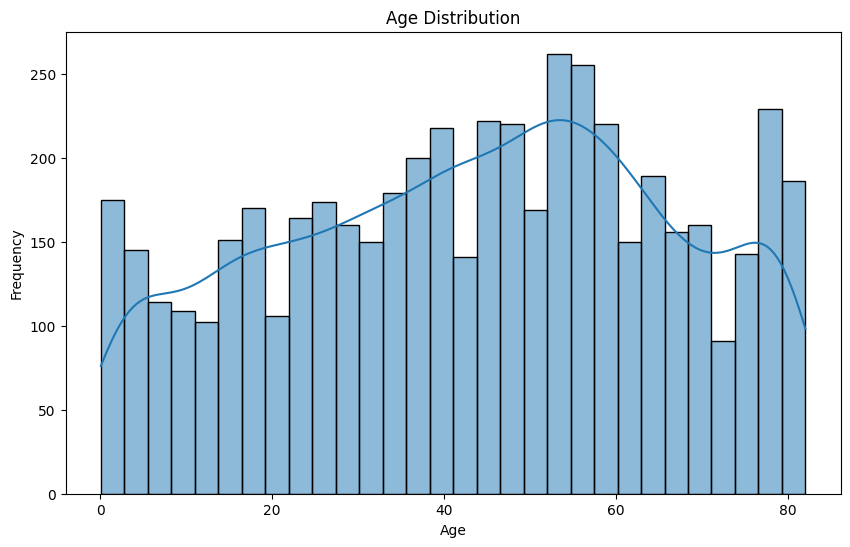

In [7]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

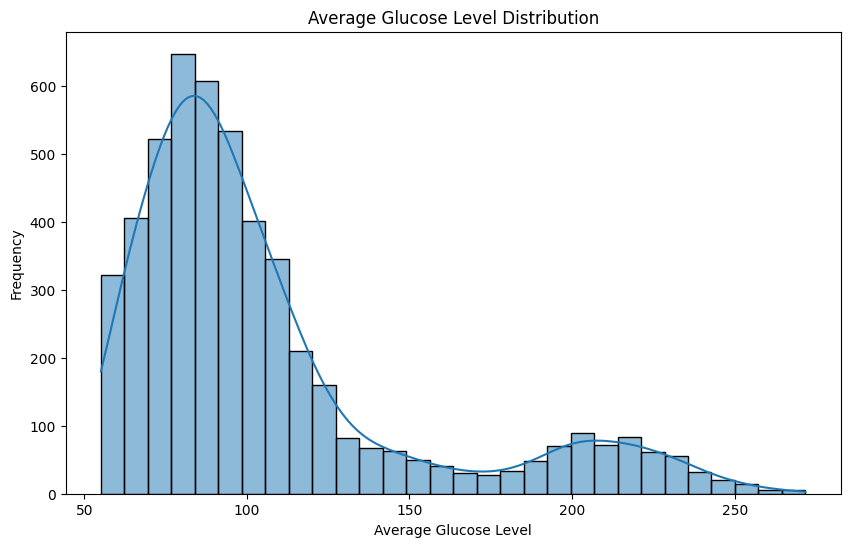

In [8]:
# Distribution of average glucose level
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_glucose_level'], kde=True, bins=30)
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

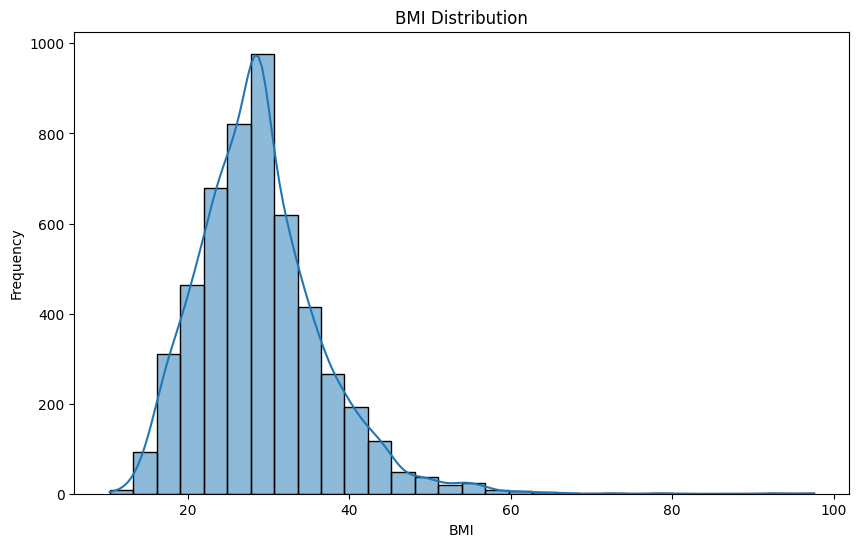

In [9]:
# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

### Correlation Heatmap
Let's see how the numeric features correlate with each other.

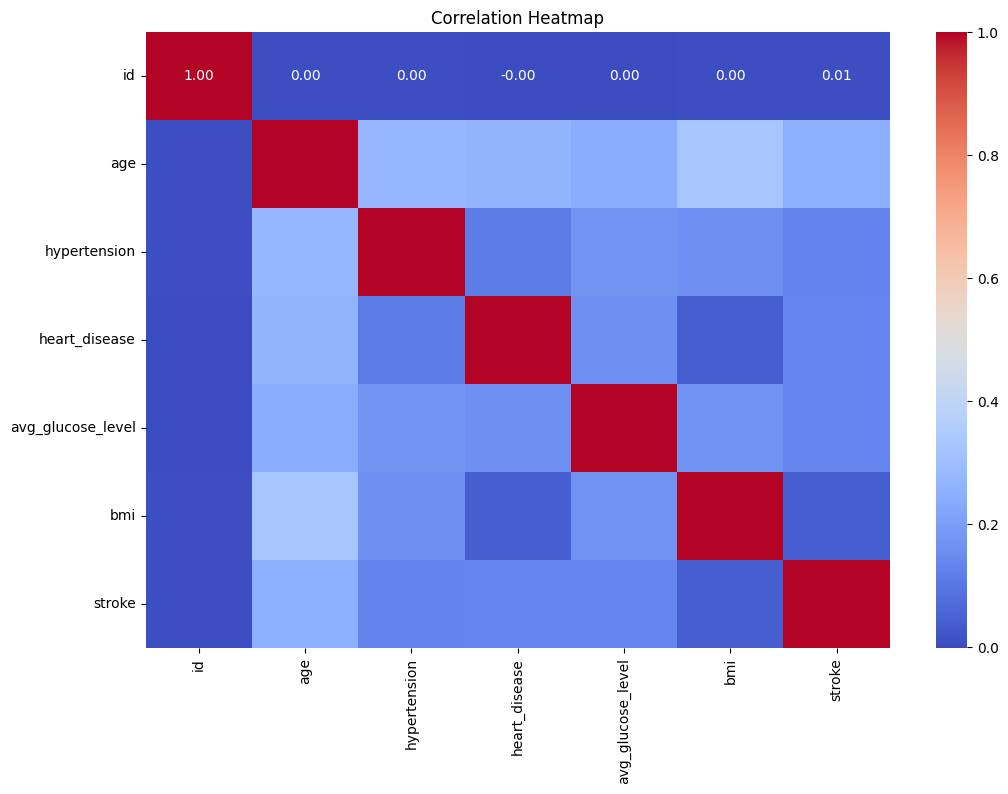

In [10]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Feature Encoding
Encode categorical variables for modeling.

In [11]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False


### Model Building
Let's build a logistic regression model to predict the likelihood of a stroke.

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])
gender_mapping = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))
print("Gender Mapping:", gender_mapping)

le_ever_married = LabelEncoder()
df['ever_married'] = le_ever_married.fit_transform(df['ever_married'])
ever_married_mapping = dict(zip(le_ever_married.classes_, le_ever_married.transform(le_ever_married.classes_)))
print("Ever Married Mapping:", ever_married_mapping)

le_work_type = LabelEncoder()
df['work_type'] = le_work_type.fit_transform(df['work_type'])
work_type_mapping = dict(zip(le_work_type.classes_, le_work_type.transform(le_work_type.classes_)))
print("Work Type Mapping:", work_type_mapping)

le_residence_type = LabelEncoder()
df['Residence_type'] = le_residence_type.fit_transform(df['Residence_type'])
residence_type_mapping = dict(zip(le_residence_type.classes_, le_residence_type.transform(le_residence_type.classes_)))
print("Residence Type Mapping:", residence_type_mapping)

le_smoking_status = LabelEncoder()
df['smoking_status'] = le_smoking_status.fit_transform(df['smoking_status'])
smoking_status_mapping = dict(zip(le_smoking_status.classes_, le_smoking_status.transform(le_smoking_status.classes_)))
print("Smoking Status Mapping:", smoking_status_mapping)

Gender Mapping: {'Female': 0, 'Male': 1, 'Other': 2}
Ever Married Mapping: {'No': 0, 'Yes': 1}
Work Type Mapping: {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
Residence Type Mapping: {'Rural': 0, 'Urban': 1}
Smoking Status Mapping: {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [16]:
# Split the data into training and testing sets
X = df.drop(['id','stroke'], axis=1)
y = df_encoded['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy

0.9393346379647749

In [19]:
conf_matrix

array([[960,   0],
       [ 62,   0]], dtype=int64)

In [20]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97       960\n           1       0.00      0.00      0.00        62\n\n    accuracy                           0.94      1022\n   macro avg       0.47      0.50      0.48      1022\nweighted avg       0.88      0.94      0.91      1022\n'

### Conclusion and Future Work
In this notebook, we explored the stroke prediction dataset, performed data cleaning, and built a logistic regression model to predict the likelihood of a stroke. The model's performance can be further improved by trying different algorithms, tuning hyperparameters, and incorporating more features.

What other analyses do you think would be useful? Feel free to share your thoughts.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)